<a href="https://colab.research.google.com/github/williamosherson/hackathon/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
thing = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/node_data.csv')

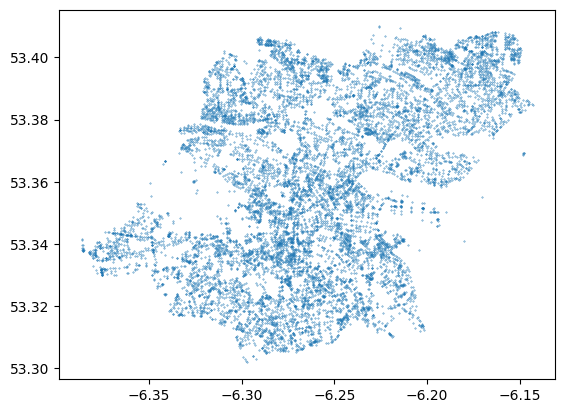

In [5]:
plt.scatter(np.array(thing['x']),np.array(thing['y']),s=0.1)

In [6]:
adj_matrix = np.load('/content/drive/MyDrive/Hackathon 2025/adj_matrix.npy')

In [7]:
adj_matrix.shape

(11565, 11565)

In [8]:
np.sum((adj_matrix.T - adj_matrix)**2)

np.float64(4170.0)

In [9]:
edges = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/edges_data.csv')
nodes = pd.read_csv('/content/drive/MyDrive/Hackathon 2025/node_data.csv')



In [10]:
edges['highway'].to_list()

['secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'tertiary',
 'secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'unclassified',
 'residential',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'unclassified',
 'tertiary',
 'secondary',
 'tertiary',
 'secondary',
 'tertiary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'residential',
 'secondary',
 'secondary',
 'residential',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'unclassified',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'tertiary',
 'tertiary',
 'secondary',
 'secondary',
 'tertiary',
 'secondary',
 'secondary',
 'resident

In [11]:
for i, maxspeed in enumerate(edges['maxspeed']):
    if isinstance(maxspeed,float):
      maxspeed=31
      edges.loc[edges.index[i], 'maxspeed'] = maxspeed
    if isinstance(maxspeed, str) and '[' in maxspeed:
          # Convert the string representation of list to actual list
          speed_list = eval(maxspeed)
          # Calculate the average
          sum = 0
          for number in eval(maxspeed):
            sum +=eval(number)
          meanmaxspeed = sum/len(eval(maxspeed))
          # Update the value in the DataFrame using .loc
          edges.loc[edges.index[i], 'maxspeed'] = meanmaxspeed

#Small change for test
for i, lanes in enumerate(edges['lanes']):
    if isinstance(lanes, str) and '[' in lanes:
          # Convert the string representation of list to actual list
          lanes_list = eval(lanes)
          # Calculate the average
          sum = 0
          for number in eval(lanes):
            sum +=eval(number)
          meanlanes = sum/len(eval(lanes))
          # Update the value in the DataFrame using .loc
          edges.loc[edges.index[i], 'lanes'] = meanlanes

#Small change for test

In [12]:
edges['lanes'] = edges['lanes'].fillna(1).astype(float)
edges['maxspeed'] = edges['maxspeed'].astype(float)

In [13]:
edges['times'] = edges['length']/edges['maxspeed']
edges['lanes'] = edges['lanes'].fillna(1).astype(float)

In [14]:
nodes

,osmid,y,x,street_count,junction,ref,highway,railway,geometry
0,389279,53.345341,-6.267631,3,NaN,NaN,NaN,NaN,POINT (-6.2676306 53.3453413)
1,389281,53.339589,-6.265864,4,NaN,NaN,NaN,NaN,POINT (-6.2658639 53.3395894)
2,389292,53.348280,-6.254945,4,yes,J41,NaN,NaN,POINT (-6.2549447 53.3482797)
3,389302,53.340196,-6.272256,3,NaN,NaN,NaN,NaN,POINT (-6.2722556 53.3401961)
4,389303,53.339365,-6.272570,3,NaN,NaN,NaN,NaN,POINT (-6.2725703 53.3393653)
...,...,...,...,...,...,...,...,...,...
11560,13013917422,53.334421,-6.243880,3,NaN,NaN,NaN,NaN,POINT (-6.2438802 53.3344211)
11561,13042760002,53.363194,-6.314448,3,NaN,NaN,NaN,NaN,POINT (-6.3144477 53.3631943)
11562,13042760003,53.363134,-6.314539,3,NaN,NaN,NaN,NaN,POINT (-6.3145391 53.363134)
11563,13051535633,53.367809,-6.276098,1,NaN,NaN,turning_circle,NaN,POINT (-6.2760979 53.3678092)


In [15]:
osmids = nodes['osmid']

In [16]:
indextoosmid=osmids.to_dict()
osmidtoindex = inverted_dict = {value: key for key, value in indextoosmid.items()}

In [17]:
from time import time_ns
time_edge_dict = {(row['u'], row['v']): row['times'] for _, row in edges.iterrows()}
lanes_edge_dict = {(row['u'], row['v']): row['lanes'] for _, row in edges.iterrows()}

In [18]:
adjacencymatrix = np.zeros((11565,11565))
for start_osmid in nodes['osmid']:
  i = osmidtoindex[start_osmid]
  for end_osmid in edges[edges['u'] == start_osmid]['v']:
    j = osmidtoindex[end_osmid]
    adjacencymatrix[i,j] += 1/(lanes_edge_dict[(start_osmid,end_osmid)]/time_edge_dict[(start_osmid,end_osmid)])

In [19]:
doubledroads = []
for i in range(11565):
  for j in range(11565):
    if adj_matrix[i,j] != 0 and adj_matrix[i,j] != 1:
      doubledroads.append((i,j))
trippledroads = []
for i in range(11565):
  for j in range(11565):
    if adj_matrix[i,j] != 0 and adj_matrix[i,j] != 1 and adj_matrix[i,j] != 2:
      trippledroads.append((i,j))

In [20]:
trippledroads

[(644, 645), (645, 644), (1170, 1171), (1171, 1170)]

In [21]:
import networkx as nx
import numpy as np
from scipy import sparse

# Create a graph from your sparse matrix
sparse_matrix = sparse.csr_matrix(adjacencymatrix)
G = nx.from_scipy_sparse_array(sparse_matrix, edge_attribute='weight')

# Let's sample 200 random nodes
k = 200
random_nodes = np.random.choice(G.nodes(), size=k, replace=False)

# Calculate partial betweenness using the sample
approx_bc = nx.betweenness_centrality_subset(
    G,
    sources=random_nodes,  # Use our random sample as sources
    targets=random_nodes,  # ...and as targets
    weight='weight',       # Use the edge weight
    normalized=False
)

# Now you have a dictionary: {node_id: approximate_bc_value}
# Sort it to find the top nodes
sorted_approx_bc = sorted(approx_bc.items(), key=lambda x: x[1], reverse=True)

print("Top 10 most central nodes (from sample):")
for i, (node, bc) in enumerate(sorted_approx_bc[:10]):
    print(f"{i+1}. Node {node}: {bc}, osmid:{indextoosmid[node]}")

Top 10 most central nodes (from sample):
1. Node 169: 5370.0, osmid:672383
2. Node 5: 4965.0, osmid:389304
3. Node 3: 4945.0, osmid:389302
4. Node 4: 4945.0, osmid:389303
5. Node 7746: 4945.0, osmid:1420459909
6. Node 7885: 4945.0, osmid:1426048972
7. Node 7896: 4945.0, osmid:1426051353
8. Node 8033: 4945.0, osmid:1430847297
9. Node 8704: 4945.0, osmid:2374841982
10. Node 9799: 4945.0, osmid:3585952599


In [23]:
scatsdata = pd.read_csv('SCATSMay2025.csv')
scatsdata

,End_Time,Region,Site,Detector,Sum_Volume,Avg_Volume,Weighted_Avg,Weighted_Var,Weighted_Std_Dev
0,20250526020000,CCITY,403.0,21.0,0.0,0.0,NaN,NaN,NaN
1,20250526020000,CCITY,403.0,22.0,0.0,0.0,NaN,NaN,NaN
2,20250526020000,CCITY,403.0,23.0,0.0,0.0,NaN,NaN,NaN
3,20250526020000,CCITY,403.0,24.0,0.0,0.0,NaN,NaN,NaN
4,20250526020000,CCITY,404.0,1.0,2.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2425122,20250516060000,IRE,6032.0,23.0,0.0,0.0,NaN,NaN,NaN
2425123,20250516060000,IRE,6032.0,24.0,0.0,0.0,NaN,NaN,NaN
2425124,20250516060000,IRE,6032.0,25.0,0.0,0.0,NaN,NaN,NaN
2425125,20250516060000,IRE,6032.0,26.0,0.0,0.0,NaN,NaN,NaN


In [24]:
scatsdata['Sum_Volume'].min()

0.0

In [25]:
trafficsignals = pd.read_csv('/content/dcc_traffic_signals_20221130.csv')
trafficsignals['SiteID'].max()

1002

In [26]:
trafficsignals

,SiteID,Site_Description_Cap,Site_Description_Lower,Region,Lat,Long,Site_Type
0,1,ABBEY ST @ MARLBOROUGH ST (LUAS),abbey st @ marlborough st (luas),CCITY,53.348754,-6.257607,SCATS Site
1,2,AMIENS ST @ SEVILLE PL,amiens st @ seville pl,CCITY,53.354711,-6.246679,SCATS Site
2,3,AMIENS ST @ TALBOT ST,amiens st @ talbot st,CCITY,53.351374,-6.250073,SCATS Site
3,4,ANNESLEY PL @ POPLAR ROW,annesley pl @ poplar row,NCITY,53.361145,-6.240513,SCATS Site
4,5,NCR @ AUGHRIM ST,ncr @ aughrim st,WCITY1,53.355797,-6.292406,SCATS Site
...,...,...,...,...,...,...,...
820,964,NORTH CIRCULAR ROAD @ TUD,north circular road @ tud,WCITY1,53.357519,-6.286843,SCATS Site
821,965,HOLE IN THE WALL / MARSFIELD BELMAYNE,hole in the wall / marsfield belmayne,DCC1,53.408150,-6.161950,SCATS Site
822,968,BRIDE ST @ BRIDE RD,bride st @ bride rd,SCITY,53.341474,-6.270088,SCATS Site
823,974,BLACKHORSE AVE @ NEPHIN RD,blackhorse ave @ nephin rd,WCITY1,53.362728,-6.311709,SCATS Site


In [27]:
# Filter scatsdata to only include sites present in trafficsignals
filtered_scatsdata = scatsdata[scatsdata['Site'].isin(trafficsignals['SiteID'])]

# Merge the filtered scatsdata with trafficsignals on the site ID
merged_data = pd.merge(filtered_scatsdata, trafficsignals, left_on='Site', right_on='SiteID', how='left')

# Create a new DataFrame with specified columns
new_df = merged_data[['SiteID', 'Lat', 'Long', 'Avg_Volume', 'Sum_Volume']]

# Group by SiteID and calculate the mean of the numerical columns
averaged_df = new_df.groupby('SiteID').mean().reset_index()

# Display the new DataFrame
display(averaged_df)

,SiteID,Lat,Long,Avg_Volume,Sum_Volume
0,1,53.348754,-6.257607,0.533190,8.564871
1,2,53.354711,-6.246679,4.308259,53.104210
2,3,53.351374,-6.250073,2.937931,36.478736
3,4,53.361145,-6.240513,1.251408,15.908502
4,5,53.355797,-6.292406,11.737613,145.527027
...,...,...,...,...,...
647,964,53.357519,-6.286843,11.534483,144.168966
648,965,53.408150,-6.161950,2.052824,26.596307
649,968,53.341474,-6.270088,1.602502,20.629042
650,974,53.362728,-6.311709,2.217931,27.360000


In [28]:
# Create a list of SiteIDs from trafficsignals that are not in scatsdata
missing_site_ids = trafficsignals[~trafficsignals['SiteID'].isin(scatsdata['Site'])]['SiteID'].tolist()

# Display the list of missing SiteIDs
len(missing_site_ids)

170

In [29]:
dlrtraffictings = pd.read_csv('/content/dlr_scats_sites-1.csv')
dlrtraffictings

,Site_ID,Location,Lat,Long
0,1124,Stillorgan Rd @ Mt Merrion Rd,53.296715,-6.204066
1,6000,Kilmacud Rd Upper @ Blackthorn Ave (Luas),53.279287,-6.210832
2,6001,Stillorgan Rd @ Trees Rd,53.293577,-6.201737
3,6002,Stillorgan Rd @ Priory Drive(T123A),53.293486,-6.201812
4,6003,Bray Rd@Brewery Rd (6003)(T121),53.282363,-6.193424
...,...,...,...,...
285,6400,Murphystown Way @ Lightburne,53.268340,-6.210580
286,6401,Dublin Road @ Woodbrook,53.218390,-6.119790
287,6402,Mount Anville Ped,53.288600,-6.218520
288,6404,Newtownpark Avenue @ Pine Lawn,53.285000,-6.177400


In [31]:
from scipy.spatial import cKDTree

# Create a KD-tree for faster nearest neighbor search
# The KD-tree is built on the node coordinates (longitude and latitude)
node_coords = nodes[['x', 'y']].values
tree = cKDTree(node_coords)

# Find the closest node for each traffic signal site
# Query the KD-tree with the traffic signal coordinates
distances, indices = tree.query(averaged_df[['Long', 'Lat']].values)

# Add the closest node index to the averaged_df
averaged_df['closest_node_index'] = indices

# Display the updated averaged_df
display(averaged_df)

,SiteID,Lat,Long,Avg_Volume,Sum_Volume,closest_node_index
0,1,53.348754,-6.257607,0.533190,8.564871,7560
1,2,53.354711,-6.246679,4.308259,53.104210,15
2,3,53.351374,-6.250073,2.937931,36.478736,7558
3,4,53.361145,-6.240513,1.251408,15.908502,3008
4,5,53.355797,-6.292406,11.737613,145.527027,363
...,...,...,...,...,...,...
647,964,53.357519,-6.286843,11.534483,144.168966,10174
648,965,53.408150,-6.161950,2.052824,26.596307,6540
649,968,53.341474,-6.270088,1.602502,20.629042,9170
650,974,53.362728,-6.311709,2.217931,27.360000,426


In [32]:
known_node_indices = averaged_df['closest_node_index'].to_list()

In [33]:
labels = np.array([averaged_df['Sum_Volume'][known_node_indices.index(index)]
                   if index in known_node_indices else 0 for index in range(11565) ])

In [ ]:
Y=labels

In [39]:
for i in range(300):
  divisor = np.sum(adj_matrix,axis=0)
  divisor[divisor==0] = 1
  Y = adj_matrix.T @ Y /divisor
  Y[labels!=0] = labels[labels!=0]
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184


KeyboardInterrupt: 

In [49]:

# Get the number of nodes and edges
num_nodes = len(nodes)
num_edges = len(edges)

# Create an empty incidence matrix
incidence_matrix = np.zeros((num_nodes, num_edges))

# Populate the incidence matrix
for edge_index, row in edges.iterrows():
    u_osmid = row['u']
    v_osmid = row['v']

    # Get the index of the nodes
    u_index = osmidtoindex[u_osmid]
    v_index = osmidtoindex[v_osmid]

    # Set the corresponding entries in the incidence matrix
    incidence_matrix[u_index, edge_index] = 1
    incidence_matrix[v_index, edge_index] = 1

# Display the incidence matrix (optional, can be large)

In [52]:
# Create a diagonal matrix with edge weights (e.g., 'times' from edges DataFrame)
edge_weights = edges['times'].values
W = np.diag(edge_weights)

# Display the diagonal matrix (optional, can be large)
# print(W)

In [ ]:
import cvxpy as cp
import numpy as np

# Let's assume:
# n_nodes: number of nodes
# n_edges: number of edges
# A: link-node incidence matrix (shape: n_nodes x n_edges)
# b_known: vector of known node volumes (shape: n_nodes). For unknown nodes, set value to 0.
# W: diagonal matrix of edge weights (e.g., free-flow travel time) (shape: n_edges x n_edges)

# Define the variable we want to find: the flow on all edges
f = cp.Variable(num_edges)

# Define the objective function: Minimize total "cost" of flow
# Example: if W is based on travel time, this minimizes total system travel time.
objective = cp.Minimize(cp.quad_form(f, W))

# Define the constraints
constraints = [
    incidence_matrix @ f == Y,  # Conservation of flow at all nodes
    f >= 0             # Non-negative flows
]

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# The solution!
print("Flow on each edge:", f.value)

/tmp/ipython-input-3898945341.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('hot') # Get the colormap object


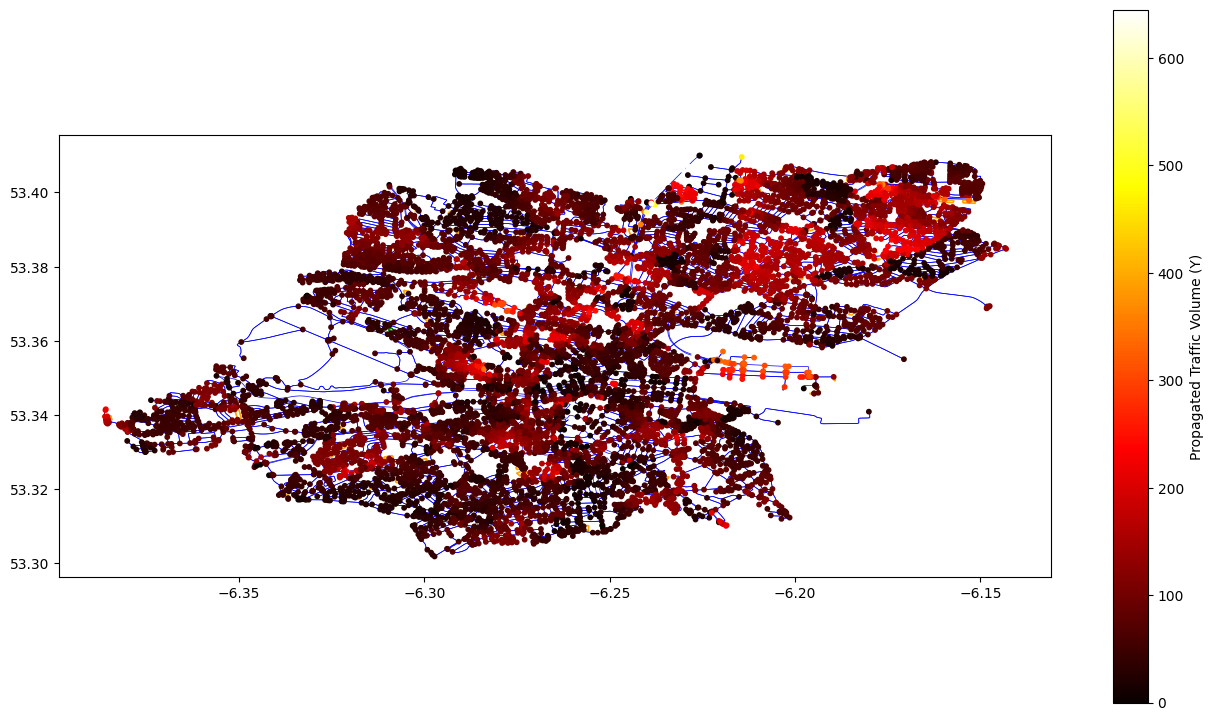

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkt import loads
import pandas as pd # Import pandas for DataFrame filtering
import numpy as np # Import numpy for linspace
import matplotlib.colors as mcolors # Import for colormap normalization

# Assuming 'edges' is a DataFrame with a 'geometry' column containing WKT strings
# Convert the 'geometry' column to a GeoSeries of shapely objects
geometry = edges['geometry'].apply(loads)
visualedges = gpd.GeoDataFrame(edges, geometry=geometry)

# Assuming 'nodes' is a DataFrame with 'x' and 'y' columns for coordinates
# Create a GeoDataFrame for the nodes
nodes_geometry = gpd.points_from_xy(nodes['x'], nodes['y'])
visualnodes = gpd.GeoDataFrame(nodes, geometry=nodes_geometry)

# Convert doubledroads and trippledroads to lists of tuples with original osmids
doubledroads_osmids = list(map(lambda element: (indextoosmid[element[0]], indextoosmid[element[1]]), doubledroads))
trippledroads_osmids = list(map(lambda element: (indextoosmid[element[0]], indextoosmid[element[1]]), trippledroads))


# Create boolean masks to identify doubled and trippled roads
is_trippled = visualedges.apply(lambda row: (row['u'], row['v']) in trippledroads_osmids or (row['v'], row['u']) in trippledroads_osmids, axis=1)
is_doubled = visualedges.apply(lambda row: (row['u'], row['v']) in doubledroads_osmids or (row['v'], row['u']) in doubledroads_osmids, axis=1)

# Separate the trippled roads, doubled roads (excluding trippled), and other roads
trippled_edges = visualedges[is_trippled]
doubled_edges = visualedges[is_doubled & ~is_trippled] # Doubled roads that are not trippled
other_edges = visualedges[~is_doubled] # Roads that are neither doubled nor trippled

# Define the number of top nodes to plot (This is not used for the heatmap of Y, can be removed or kept for other purposes)
# n = 500 # Set the desired number of top nodes here

# Create a GeoDataFrame for the traffic signals from the averaged_df (Keeping this for potential future use or comparison)
traffic_signals_geometry = gpd.points_from_xy(averaged_df['Long'], averaged_df['Lat'])
traffic_signals_gdf = gpd.GeoDataFrame(averaged_df, geometry=traffic_signals_geometry)

# Create a colormap for the Y values
cmap = plt.cm.get_cmap('hot') # Get the colormap object

# Normalize the Y values to the colormap range
norm = mcolors.Normalize(vmin=Y.min(), vmax=Y.max())


# Now plot the GeoDataFrames
fig, ax = plt.subplots(1, 1, figsize=(16, 9)) # Increase figure size

# Plot the edges with a lower zorder
other_edges.plot(ax=ax, linewidth=0.5, color='blue', zorder=1) # Plot other edges in blue
doubled_edges.plot(ax=ax, linewidth=1.0, color='orange', zorder=1) # Increased linewidth for doubled roads
trippled_edges.plot(ax=ax, linewidth=1, color='green', zorder=1) # Increased linewidth for trippled roads


# Plot all nodes, colored by the Y values, with a higher zorder
visualnodes.plot(ax=ax, markersize=10, color=cmap(norm(Y)), zorder=2) # Plot nodes with color based on Y values

# Add a color bar for the Y values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # Needed for the colorbar to work
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Propagated Traffic Volume (Y)')


# Plot the traffic signals (Optional, keeping it in case you want to see their location relative to the heatmap)
# traffic_signals_gdf.plot(ax=ax, markersize=100, color='purple', marker='X', label='Traffic Signals', zorder=3)

# Add a legend if you keep the traffic signals plot
# ax.legend()

# Save the figure before showing it
# plt.savefig('propagated_traffic_heatmap.png', dpi=1000) # Save with higher dpi and new filename

plt.show()